In [15]:
import torch

In [16]:
import matplotlib.pyplot as plt

src = "https://machinelearningmastery.com/building-a-single-layer-neural-network-in-pytorch/"

In [17]:
# generate synthetic the data
# torch.arange(start, end, step) -> return Tensor
# Tensor.view(-1, 1) -> means to reshape to second dimension size = 1(1 column, row number auto inferred), without modifying the data
X = torch.arange(-30, 30, 1).view(-1, 1).type(torch.FloatTensor) 
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] <= -10)] = 1.0
Y[(X[:, 0] > -10) & (X[:, 0] < 10)] = 0.5
Y[(X[:, 0] > 10)] = 0

In [18]:
X # observe its dimension

tensor([[-30.],
        [-29.],
        [-28.],
        [-27.],
        [-26.],
        [-25.],
        [-24.],
        [-23.],
        [-22.],
        [-21.],
        [-20.],
        [-19.],
        [-18.],
        [-17.],
        [-16.],
        [-15.],
        [-14.],
        [-13.],
        [-12.],
        [-11.],
        [-10.],
        [ -9.],
        [ -8.],
        [ -7.],
        [ -6.],
        [ -5.],
        [ -4.],
        [ -3.],
        [ -2.],
        [ -1.],
        [  0.],
        [  1.],
        [  2.],
        [  3.],
        [  4.],
        [  5.],
        [  6.],
        [  7.],
        [  8.],
        [  9.],
        [ 10.],
        [ 11.],
        [ 12.],
        [ 13.],
        [ 14.],
        [ 15.],
        [ 16.],
        [ 17.],
        [ 18.],
        [ 19.],
        [ 20.],
        [ 21.],
        [ 22.],
        [ 23.],
        [ 24.],
        [ 25.],
        [ 26.],
        [ 27.],
        [ 28.],
        [ 29.]])

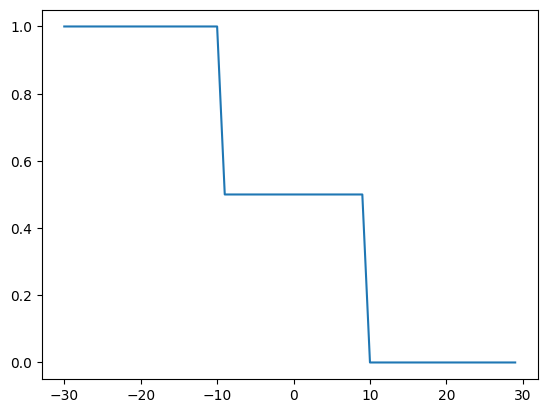

In [19]:
plt.plot(X, Y)
plt.show()

### Create Model

In [20]:
# Define the class for single layer NN

class one_layer_net(torch.nn.Module):    
    # Constructor
    def __init__(self, input_size, hidden_neurons, output_size):
        super(one_layer_net, self).__init__()
        # hidden layer 
        self.linear_one = torch.nn.Linear(input_size, hidden_neurons)
        self.linear_two = torch.nn.Linear(hidden_neurons, output_size) 
        # defining layers as attributes
        self.layer_in = None
        self.act = None
        self.layer_out = None

    # prediction function
    def forward(self, x): # x is the input mtx
        self.layer_in = self.linear_one(x)
        self.act = torch.sigmoid(self.layer_in)
        self.layer_out = self.linear_two(self.act)
        y_pred = torch.sigmoid(self.linear_two(self.act))
        return y_pred

In [21]:
model = one_layer_net(1,2,1)


### Train the Model

In [22]:
# train the first model with single layer

def criterion(y_pred, y): # loss function
    out = -1 * torch.mean(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred))
    return out

'''
def criterion(y_pred, y): # convergence very slow because the numbers are small
    out = torch.mean(0.5 * (y - y_pred) ** 2)
    return out
'''

optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Stochastic gradient descent

1000 epochs done!


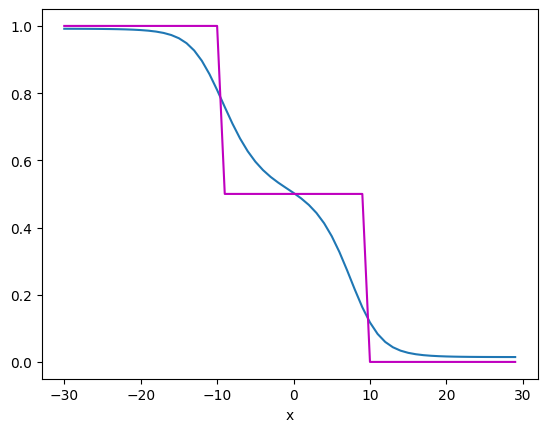

2000 epochs done!


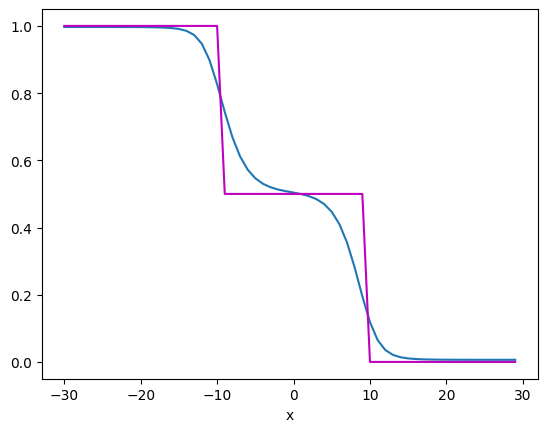

3000 epochs done!


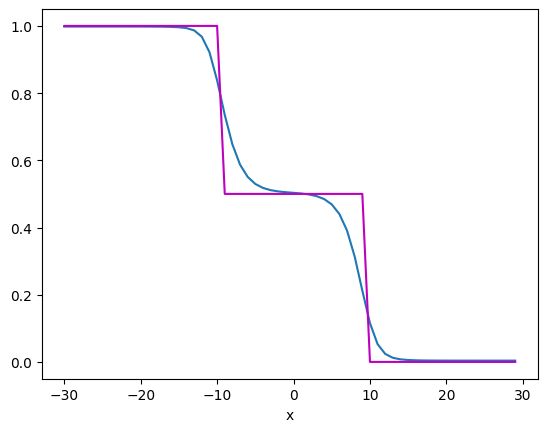

4000 epochs done!


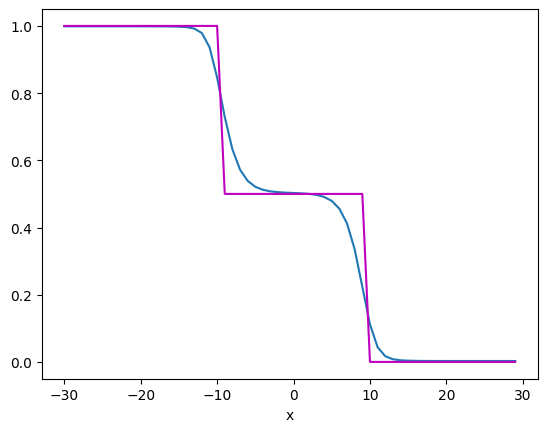

5000 epochs done!


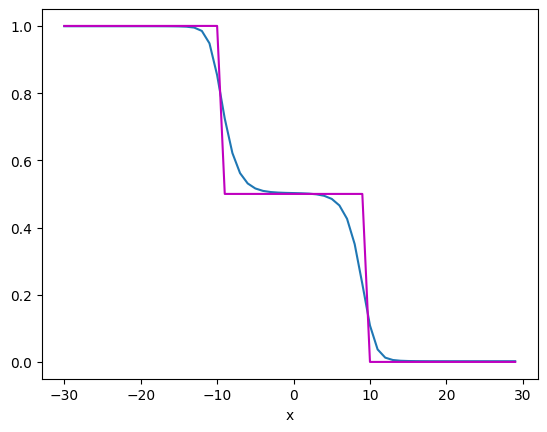

In [23]:
# Define the training loop
epochs=5000
cost = []
total=0
for epoch in range(epochs):
    total=0
    epoch = epoch + 1
    for x, y in zip(X, Y):
        yhat = model(x)
        loss = criterion(yhat, y)
        loss.backward() # computes the gradients for all nodes
        optimizer.step()
        optimizer.zero_grad() # reset the gradients
        # get total loss 
        total+=loss.item() 
    cost.append(total)
    if epoch % 1000 == 0:
        print(str(epoch)+ " " + "epochs done!") # visualze results after every 1000 epochs   
        # plot the result of function approximator
        plt.plot(X.numpy(), model(X).detach().numpy())
        plt.plot(X.numpy(), Y.numpy(), 'm')
        plt.xlabel('x')
        plt.show()

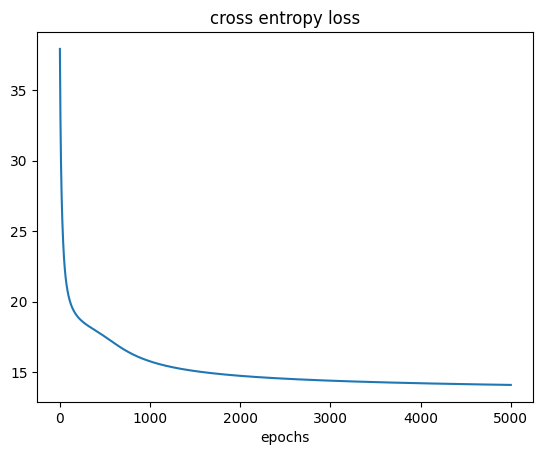

In [24]:
# plot the cost
plt.plot(cost)
plt.xlabel('epochs')
plt.title('cross entropy loss')
plt.show()

#### What you can modify:  
1. Loss function
2. Number of layers
3. Number of perceptrons
4. Activation functions
5. GD method